# 1- import packages and load data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel("candyhierarchy2017.xlsx")
data.head()

c:\users\microsoft\appdata\local\programs\python\python38\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,...,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,...,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(84, 25)"
2,90272829,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90272840,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,...,NaN,Raisins can go to hell,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(75, 23)"
4,90272841,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,...,NaN,NaN,White and gold,NaN,Friday,NaN,1.0,NaN,NaN,"(70, 10)"


# 2- show some general properties for the data 

In [3]:
data.shape

(2460, 120)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Columns: 120 entries, Internal ID to Click Coordinates (x, y)
dtypes: float64(4), int64(1), object(115)
memory usage: 2.3+ MB


In [5]:
data.dtypes.head(50)

Internal ID                                                                                int64
Q1: GOING OUT?                                                                            object
Q2: GENDER                                                                                object
Q3: AGE                                                                                   object
Q4: COUNTRY                                                                               object
Q5: STATE, PROVINCE, COUNTY, ETC                                                          object
Q6 | 100 Grand Bar                                                                        object
Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)    object
Q6 | Any full-sized candy bar                                                             object
Q6 | Black Jacks                                                                          object
Q6 | Bonkers (the candy)      

In [6]:
data.dtypes.tail(50)

Q6 | Mint Kisses                                                                object
Q6 | Mint Juleps                                                                object
Q6 | Mr. Goodbar                                                                object
Q6 | Necco Wafers                                                               object
Q6 | Nerds                                                                      object
Q6 | Nestle Crunch                                                              object
Q6 | Now'n'Laters                                                               object
Q6 | Peeps                                                                      object
Q6 | Pencils                                                                    object
Q6 | Pixy Stix                                                                  object
Q6 | Real Housewives of Orange County Season 9 Blue-Ray                         object
Q6 | Reese’s Peanut Butter Cups            

In [7]:
data.isnull().sum().head(50)

Internal ID                                                                                  0
Q1: GOING OUT?                                                                             110
Q2: GENDER                                                                                  41
Q3: AGE                                                                                     84
Q4: COUNTRY                                                                                 64
Q5: STATE, PROVINCE, COUNTY, ETC                                                           100
Q6 | 100 Grand Bar                                                                         747
Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)     734
Q6 | Any full-sized candy bar                                                              672
Q6 | Black Jacks                                                                           958
Q6 | Bonkers (the candy)                          

In [8]:
data.isnull().sum().tail(50)

Q6 | Mint Kisses                                                                776
Q6 | Mint Juleps                                                                811
Q6 | Mr. Goodbar                                                                740
Q6 | Necco Wafers                                                               744
Q6 | Nerds                                                                      723
Q6 | Nestle Crunch                                                              698
Q6 | Now'n'Laters                                                               817
Q6 | Peeps                                                                      710
Q6 | Pencils                                                                    709
Q6 | Pixy Stix                                                                  722
Q6 | Real Housewives of Orange County Season 9 Blue-Ray                         753
Q6 | Reese’s Peanut Butter Cups                                             

# 3- write summary about what you get form the above functions

**we have 2460 rows and 120 columns, AGE column has a wrong data type it should be int, all columns have null values we should handle it**

# cleaning

## rename columns name

In [9]:
import re

In [10]:
def rename_cols(col):
    pattern=r"^\w+\s+(\|)?\s+"
    regex=re.compile(pattern)
    new_col=regex.sub("",col)
    return new_col 

In [11]:
columns=data.columns.to_list()
new_cols=[]
for i in range(len(columns)):
    new_col=rename_cols(columns[i])
    new_cols.append(new_col)
new_cols

['Internal ID',
 'Q1: GOING OUT?',
 'Q2: GENDER',
 'Q3: AGE',
 'Q4: COUNTRY',
 'Q5: STATE, PROVINCE, COUNTY, ETC',
 '100 Grand Bar',
 'Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',
 'Any full-sized candy bar',
 'Black Jacks',
 'Bonkers (the candy)',
 'Bonkers (the board game)',
 'Bottle Caps',
 "Box'o'Raisins",
 'Broken glow stick',
 'Butterfinger',
 'Cadbury Creme Eggs',
 'Candy Corn',
 'Candy that is clearly just the stuff given out for free at restaurants',
 'Caramellos',
 'Cash, or other forms of legal tender',
 'Chardonnay',
 'Chick-o-Sticks (we don’t know what that is)',
 'Chiclets',
 'Coffee Crisp',
 'Creepy Religious comics/Chick Tracts',
 'Dental paraphenalia',
 'Dots',
 'Dove Bars',
 'Fuzzy Peaches',
 'Generic Brand Acetaminophen',
 'Glow sticks',
 'Goo Goo Clusters',
 "Good N' Plenty",
 'Gum from baseball cards',
 'Gummy Bears straight up',
 'Hard Candy',
 'Healthy Fruit',
 'Heath Bar',
 "Hershey's Dark Chocolate",
 'Hershey’s Milk Choco

In [12]:
copy_data=data.copy()

In [13]:
new_cols[1:6]=['GOING OUT','GENDER','AGE','COUNTRY','STATE']

In [14]:
new_cols[-6:-1]=['DAY','Daily Dish','Science','ESPN','Yahoo']

In [15]:
new_cols[-11:-7]=['JOY OTHER','DESPAIR OTHER','OTHER COMMENTS','DRESS']

In [16]:
copy_data.columns=new_cols

In [17]:
copy_data.columns

Index(['Internal ID', 'GOING OUT', 'GENDER', 'AGE', 'COUNTRY', 'STATE',
       '100 Grand Bar',
       'Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',
       'Any full-sized candy bar', 'Black Jacks',
       ...
       'DESPAIR OTHER', 'OTHER COMMENTS', 'DRESS', 'Unnamed: 113', 'DAY',
       'Daily Dish', 'Science', 'ESPN', 'Yahoo', 'Click Coordinates (x, y)'],
      dtype='object', length=120)

In [18]:
copy_data.sample(1).iloc[0]

Internal ID                      90273334
GOING OUT                             Yes
GENDER                               Male
AGE                                    34
COUNTRY                     United States
                                ...      
Daily Dish                            NaN
Science                               NaN
ESPN                                  NaN
Yahoo                                 NaN
Click Coordinates (x, y)              NaN
Name: 213, Length: 120, dtype: object

In [19]:
copy_data.nunique()[:10]

Internal ID                                                                          2460
GOING OUT                                                                               2
GENDER                                                                                  4
AGE                                                                                   106
COUNTRY                                                                               128
STATE                                                                                 511
100 Grand Bar                                                                           3
Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)       3
Any full-sized candy bar                                                                3
Black Jacks                                                                             3
dtype: int64

## clean country column

In [20]:
copy_data['COUNTRY'].unique()[:50]

array([nan, 'USA ', 'USA', 'us', 'usa', 'canada', 'Canada', 'Us', 'US',
       'Murica', 'United States', 'uk', 'United Kingdom', 'united states',
       'Usa', 'United States ', 'United staes',
       'United States of America', 'UAE', 'England', 'UK', 'canada ',
       'Mexico', 'United states', 'u.s.a.', 'USAUSAUSA', 'america', 35,
       'france', 'United States of America ', 'U.S.A.', 'finland',
       'unhinged states', 'Canada ', 'united states of america',
       'US of A', 'Unites States', 'The United States', 'North Carolina ',
       'Unied States', 'Netherlands', 'germany', 'Europe', 'Earth', 'U S',
       'u.s.', 'U.K. ', 'Costa Rica', 'The United States of America',
       'unite states'], dtype=object)

In [21]:
copy_data['COUNTRY']=copy_data['COUNTRY'].str.lower()

In [22]:
copy_data['STATE']=copy_data['STATE'].str.lower()

In [23]:
copy_data[['COUNTRY','STATE']].nunique()

COUNTRY     99
STATE      378
dtype: int64

In [24]:
copy_data['COUNTRY']=copy_data['COUNTRY'].str.strip()
copy_data['STATE']=copy_data['STATE'].str.strip()

In [25]:
copy_data[['COUNTRY','STATE']].nunique()

COUNTRY     90
STATE      329
dtype: int64

In [26]:
copy_data['COUNTRY'].unique()[:50]

array([nan, 'usa', 'us', 'canada', 'murica', 'united states', 'uk',
       'united kingdom', 'united staes', 'united states of america',
       'uae', 'england', 'mexico', 'u.s.a.', 'usausausa', 'america',
       'france', 'finland', 'unhinged states', 'us of a', 'unites states',
       'the united states', 'north carolina', 'unied states',
       'netherlands', 'germany', 'europe', 'earth', 'u s', 'u.s.', 'u.k.',
       'costa rica', 'the united states of america', 'unite states',
       'cascadia', 'australia', 'insanity lately', 'greece',
       'usa? hard to tell anymore..', "'merica", 'usas', 'pittsburgh',
       'united state', 'a', 'can', 'canae', 'new york', 'trumpistan',
       'ireland', 'united sates'], dtype=object)

In [27]:
usa_dict={
    'us':'usa',
    'murica':'usa',
    'united staes':'usa',
    'united states of america':'usa',
    'u.s.a.':'usa', 
    'usausausa':'usa', 
    'america':'usa',
    'unhinged states':'usa', 
    'us of a':'usa',
    'unites states':'usa',
    'the united states':'usa',
    'unied states':'usa',
    'u s':'usa', 
    'u.s.':'usa',
    'the united states of america':'usa',
    'unite states':'usa',
    'usa? hard to tell anymore..':'usa',
    "'merica":'usa', 'usas':'usa',
    'united state':'usa', 'a':'usa',
    'new york':'usa','united sates':'usa',
    'united states':'usa','california':'usa',
    'i pretend to be from canada, but i am really from the united states.':'usa',
    'united stated':'usa',
    'ahem....amerca':'usa','ud':'usa',
    'new jersey':'usa','united ststes':'usa',
    'atlantis':'usa', 'murrika':'usa', 'usa! usa! usa!':'usa', 'usaa':'usa',
    'u s a':'usa', 'united statea':'usa',
    'usa usa usa!!!!':'usa',
    'alaska':'usa', 'soviet canuckistan':'usa', 'n. america':'usa',
    'ussa':'usa','united statss':'usa',
    'north carolina':'usa','trumpistan':'usa',
    'cascadia':'usa'
}

In [28]:
copy_data['COUNTRY']=copy_data['COUNTRY'].replace(usa_dict)

In [29]:
copy_data['COUNTRY'].nunique()

44

In [30]:
copy_data['COUNTRY'].unique()

array([nan, 'usa', 'canada', 'uk', 'united kingdom', 'uae', 'england',
       'mexico', 'france', 'finland', 'netherlands', 'germany', 'europe',
       'earth', 'u.k.', 'costa rica', 'australia', 'insanity lately',
       'greece', 'pittsburgh', 'can', 'canae', 'ireland', 'korea',
       'japan', 'south africa', 'iceland', 'canada`', 'scotland',
       'denmark', 'switzerland', 'south korea', 'indonesia',
       'the netherlands', 'endland', 'singapore', 'china', 'taiwan',
       'hong kong', 'spain', 'sweden', 'narnia',
       'subscribe to dm4uz3 on youtube', "i don't know anymore",
       'fear and loathing'], dtype=object)

In [31]:
copy_data['COUNTRY']=copy_data['COUNTRY'].replace({'endland':'uk'
                              ,'united kingdom':'uk',
                              'narnia':'uk',
                              'england':'uk',
                               'u.k.':'uk',
                                'endland':'uk'})

In [32]:
copy_data['COUNTRY']=copy_data['COUNTRY'].replace({
        'insanity lately':"",
        'pittsburgh':"",
        'subscribe to dm4uz3 on youtube':"", 
        "i don't know anymore":"",
       'fear and loathing':""
})

In [33]:
copy_data['COUNTRY']=copy_data['COUNTRY'].replace({
    'can':"canada", 'canae':'canada','canada`':'canada'
})

In [34]:
copy_data['COUNTRY']=copy_data['COUNTRY'].replace({'hong kong':'china'})

In [35]:
copy_data['COUNTRY'].nunique()

31

In [36]:
copy_data['COUNTRY'].unique()

array([nan, 'usa', 'canada', 'uk', 'uae', 'mexico', 'france', 'finland',
       'netherlands', 'germany', 'europe', 'earth', 'costa rica',
       'australia', '', 'greece', 'ireland', 'korea', 'japan',
       'south africa', 'iceland', 'scotland', 'denmark', 'switzerland',
       'south korea', 'indonesia', 'the netherlands', 'singapore',
       'china', 'taiwan', 'spain', 'sweden'], dtype=object)

## clean AGE column

In [37]:
copy_data['AGE'].unique()

array([nan, 44, 49, 40, 23, 53, 33, 43, 56, 64, 37, 59, 48, 54, 36, 45,
       25, 34, 35, 38, 58, 50, 47, 16, 52, 63, 65, 41, 27, 31, 61, 46, 42,
       62, 29, 39, 32, 28, 69, 67, 30, 22, 26, 51, 70, 24, 18, 19,
       'Old enough', 57, 60, 66, 12, 'Many', 55, 72, '?', 21, 11, 'no', 9,
       68, 20, 6, 10, 71, 90, 13, '45-55', 312, 99, 7, 'hahahahaha', 88,
       39.4, 74, 102, 'older than dirt', 17, 15, 8, 75, '5u', 'Enough',
       'See question 2', '24-50', 14, 'Over 50', 100, 76, 1000,
       'sixty-nine', '46 Halloweens.', 'ancient', 77, 'OLD', 'old', 73,
       70.5, 1, 'MY NAME JEFF', 4, '59 on the day after Halloween',
       'old enough', 'your mom',
       'I can remember when Java was a cool new language', '60+'],
      dtype=object)

In [38]:
copy_data['AGE']=copy_data['AGE'].replace({
    'Old enough':'',
    '45-55':'50',
    'hahahahaha':"",
    '312':'31',
    'older than dirt':"",
    'Enough':"",
    '5u':'50',
    'sixty-nine':'69',
    'OLD':'', 'old':'',
    'ancient':'','46 Halloweens.':'46','Many':'',
    'Over 50':'51','MY NAME JEFF':'',
    '59 on the day after Halloween':'59',
    'old enough':'', 'your mom':"",
    'I can remember when Java was a cool new language':"", '60+':'61',
    'See question 2':"",'24-50':"37"
    
})

In [39]:
copy_data['AGE']=copy_data['AGE'].replace({'':np.nan})

In [40]:
copy_data['AGE']=copy_data['AGE'].replace({'?':np.nan})

In [41]:
copy_data['AGE']=copy_data['AGE'].replace({'no':np.nan})

In [42]:
copy_data['AGE']=copy_data['AGE'].astype('float')

In [43]:
copy_data['AGE'].describe()

count    2360.000000
mean       42.652076
std        23.819607
min         1.000000
25%        34.000000
50%        41.500000
75%        50.000000
max      1000.000000
Name: AGE, dtype: float64

In [44]:
iqr=50-34
mask=(copy_data['AGE']<(50+1.5*iqr)) & (copy_data['AGE']>(34-1.5*iqr))

In [45]:
copy_data=copy_data.loc[mask]

In [46]:
copy_data.head()

,Internal ID,GOING OUT,GENDER,AGE,COUNTRY,STATE,100 Grand Bar,Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,...,DESPAIR OTHER,OTHER COMMENTS,DRESS,Unnamed: 113,DAY,Daily Dish,Science,ESPN,Yahoo,"Click Coordinates (x, y)"
1,90272821,No,Male,44.0,usa,nm,MEH,DESPAIR,JOY,MEH,...,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(84, 25)"
2,90272829,NaN,Male,49.0,usa,virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90272840,No,Male,40.0,usa,or,MEH,DESPAIR,JOY,MEH,...,NaN,Raisins can go to hell,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(75, 23)"
4,90272841,No,Male,23.0,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,...,NaN,NaN,White and gold,NaN,Friday,NaN,1.0,NaN,NaN,"(70, 10)"
6,90272853,No,Male,53.0,usa,colorado,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## dealing with missing values

In [47]:
mode1=copy_data['COUNTRY'].mode()[0]

In [48]:
copy_data['COUNTRY'].fillna(mode1,inplace=True)

In [49]:
copy_data.duplicated().sum()

0

In [50]:
copy_data.drop(columns=['ESPN','Yahoo','JOY OTHER','OTHER COMMENTS','DESPAIR OTHER','Unnamed: 113','Daily Dish','Science'],inplace=True)

In [51]:
copy_data['GOING OUT'].unique()

array(['No', nan, 'Yes'], dtype=object)

In [52]:
copy_data['GOING OUT'].isnull().sum()

83

In [53]:
copy_data['GOING OUT'].value_counts()

GOING OUT
No     1962
Yes     284
Name: count, dtype: int64

In [54]:
copy_data['GOING OUT'].fillna('No',inplace=True)

In [55]:
copy_data['GENDER'].unique()

array(['Male', 'Female', "I'd rather not say", nan, 'Other'], dtype=object)

In [56]:
copy_data['GENDER'].value_counts()

GENDER
Male                  1417
Female                 816
I'd rather not say      63
Other                   26
Name: count, dtype: int64

In [57]:
copy_data['GENDER'].isnull().sum()

7

In [58]:
copy_data['GENDER'].fillna('Other',inplace=True)

In [59]:
copy_data['AGE']=copy_data['AGE'].astype('int')

In [60]:
copy_data.columns

Index(['Internal ID', 'GOING OUT', 'GENDER', 'AGE', 'COUNTRY', 'STATE',
       '100 Grand Bar',
       'Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',
       'Any full-sized candy bar', 'Black Jacks',
       ...
       'Twix',
       'Vials of pure high fructose corn syrup, for main-lining into your vein',
       'Vicodin', 'Whatchamacallit Bars', 'White Bread',
       'Whole Wheat anything', 'York Peppermint Patties', 'DRESS', 'DAY',
       'Click Coordinates (x, y)'],
      dtype='object', length=112)

In [61]:
copy_data['DAY'].unique()

array(['Sunday', nan, 'Friday'], dtype=object)

In [62]:
copy_data['DAY'].value_counts()

DAY
Friday    1049
Sunday     617
Name: count, dtype: int64

In [63]:
copy_data['DAY'].isnull().sum()

663

In [64]:
copy_data['DAY'].fillna(method='ffill',inplace=True)

In [65]:
copy_data['DRESS'].unique()

array(['White and gold', nan, 'Blue and black'], dtype=object)

In [66]:
copy_data['DRESS'].value_counts()

DRESS
White and gold    1041
Blue and black     606
Name: count, dtype: int64

In [67]:
copy_data['DRESS'].fillna(method='bfill',inplace=True)

In [68]:
copy_data.drop(columns='Internal ID',inplace=True)

In [69]:
copy_data.drop(columns='Click Coordinates (x, y)',inplace=True)

In [70]:
copy_data.columns

Index(['GOING OUT', 'GENDER', 'AGE', 'COUNTRY', 'STATE', '100 Grand Bar',
       'Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',
       'Any full-sized candy bar', 'Black Jacks', 'Bonkers (the candy)',
       ...
       'Trail Mix', 'Twix',
       'Vials of pure high fructose corn syrup, for main-lining into your vein',
       'Vicodin', 'Whatchamacallit Bars', 'White Bread',
       'Whole Wheat anything', 'York Peppermint Patties', 'DRESS', 'DAY'],
      dtype='object', length=110)

In [71]:
df_melt=pd.melt(copy_data,id_vars=['GOING OUT', 'GENDER', 'AGE', 'COUNTRY', 'STATE', 'DRESS', 'DAY'],
       var_name='candy_name',value_name='feeling')

In [72]:
df_melt.head()

,GOING OUT,GENDER,AGE,COUNTRY,STATE,DRESS,DAY,candy_name,feeling
0,No,Male,44,usa,nm,White and gold,Sunday,100 Grand Bar,MEH
1,No,Male,49,usa,virginia,White and gold,Sunday,100 Grand Bar,NaN
2,No,Male,40,usa,or,White and gold,Sunday,100 Grand Bar,MEH
3,No,Male,23,usa,exton pa,White and gold,Friday,100 Grand Bar,JOY
4,No,Male,53,usa,colorado,Blue and black,Friday,100 Grand Bar,NaN


In [73]:
df_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239887 entries, 0 to 239886
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   GOING OUT   239887 non-null  object
 1   GENDER      239887 non-null  object
 2   AGE         239887 non-null  int32 
 3   COUNTRY     239887 non-null  object
 4   STATE       236076 non-null  object
 5   DRESS       239887 non-null  object
 6   DAY         239887 non-null  object
 7   candy_name  239887 non-null  object
 8   feeling     168537 non-null  object
dtypes: int32(1), object(8)
memory usage: 15.6+ MB


In [74]:
df_melt['feeling'].value_counts()

feeling
JOY        61665
DESPAIR    55699
MEH        51173
Name: count, dtype: int64

In [75]:
df_melt['feeling'].fillna('unkown',inplace=True)

# EDA

In [76]:
df_melt.head()

,GOING OUT,GENDER,AGE,COUNTRY,STATE,DRESS,DAY,candy_name,feeling
0,No,Male,44,usa,nm,White and gold,Sunday,100 Grand Bar,MEH
1,No,Male,49,usa,virginia,White and gold,Sunday,100 Grand Bar,unkown
2,No,Male,40,usa,or,White and gold,Sunday,100 Grand Bar,MEH
3,No,Male,23,usa,exton pa,White and gold,Friday,100 Grand Bar,JOY
4,No,Male,53,usa,colorado,Blue and black,Friday,100 Grand Bar,unkown


<Axes: xlabel='GENDER', ylabel='count'>

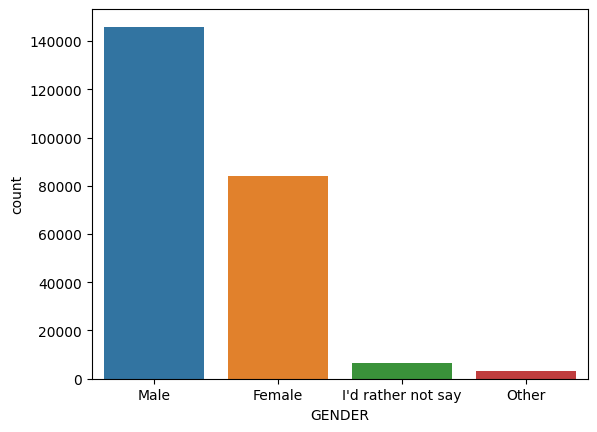

In [77]:
sns.countplot(x=df_melt['GENDER'])

<Axes: xlabel='GOING OUT', ylabel='count'>

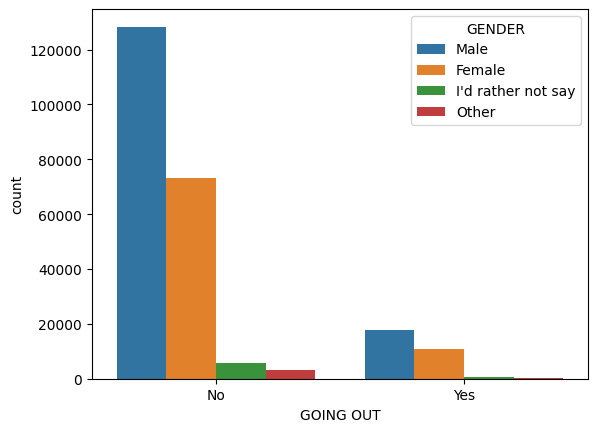

In [78]:
sns.countplot(x=df_melt['GOING OUT'],hue=df_melt['GENDER'])

<Axes: ylabel='COUNTRY'>

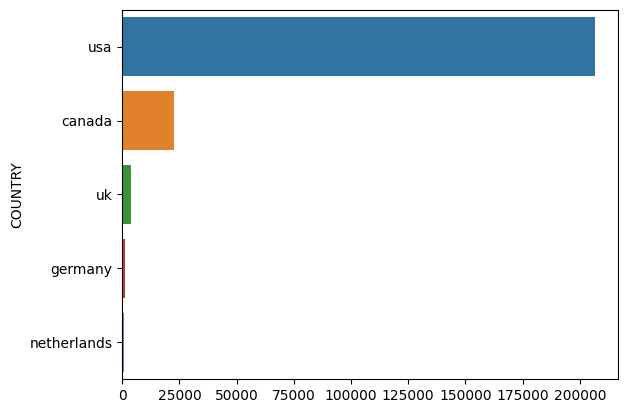

In [79]:
country=df_melt['COUNTRY'].value_counts().head()
sns.barplot(x=country.values,y=country.index)

<Axes: xlabel='DRESS', ylabel='count'>

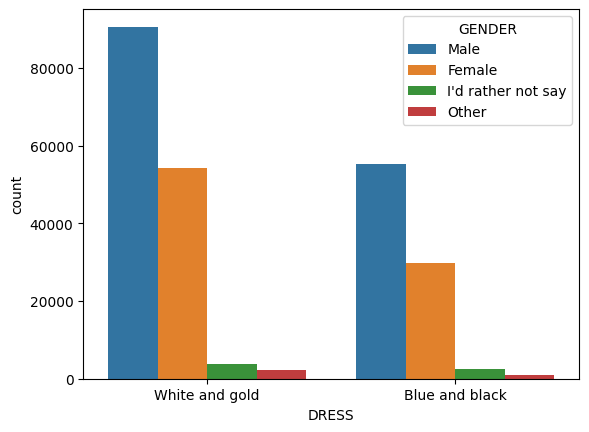

In [80]:
sns.countplot(x=df_melt['DRESS'],hue=df_melt['GENDER'])

<Axes: xlabel='DAY', ylabel='count'>

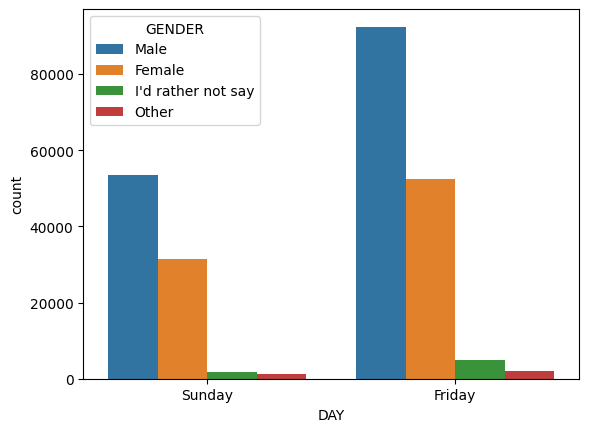

In [81]:
sns.countplot(x=df_melt['DAY'],hue=df_melt['GENDER'])

In [82]:
hated_candy=df_melt.groupby('feeling').get_group('DESPAIR')['candy_name'].value_counts().head(7)

Text(0.5, 1.0, 'the most hated candy')

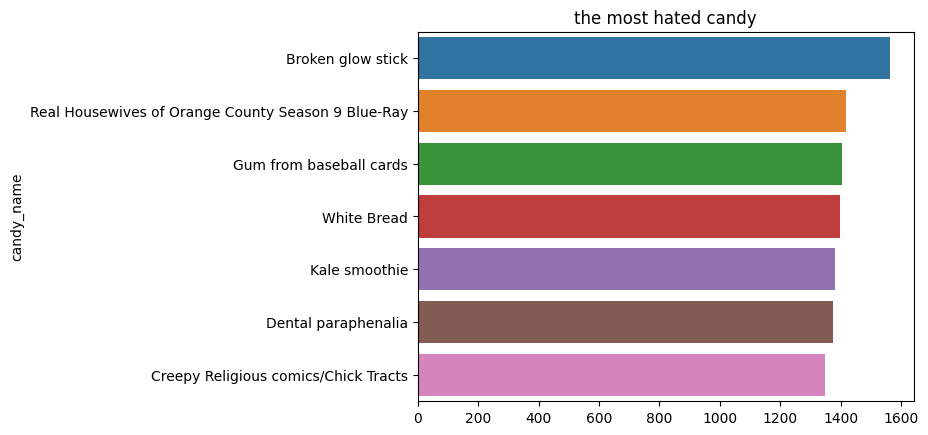

In [83]:
sns.barplot(x=hated_candy.values,y=hated_candy.index)
plt.title('the most hated candy')

In [84]:
loved_candy=df_melt.groupby('feeling').get_group('JOY')['candy_name'].value_counts().head(7)

Text(0.5, 1.0, 'the most loved candy')

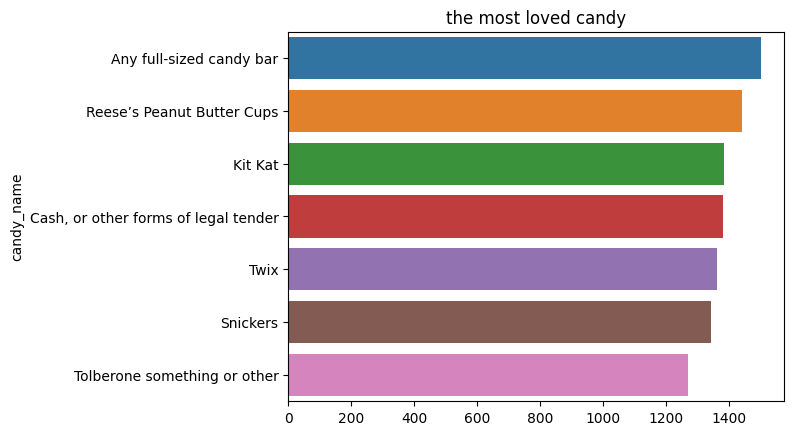

In [85]:
sns.barplot(x=loved_candy.values,y=loved_candy.index)
plt.title('the most loved candy')

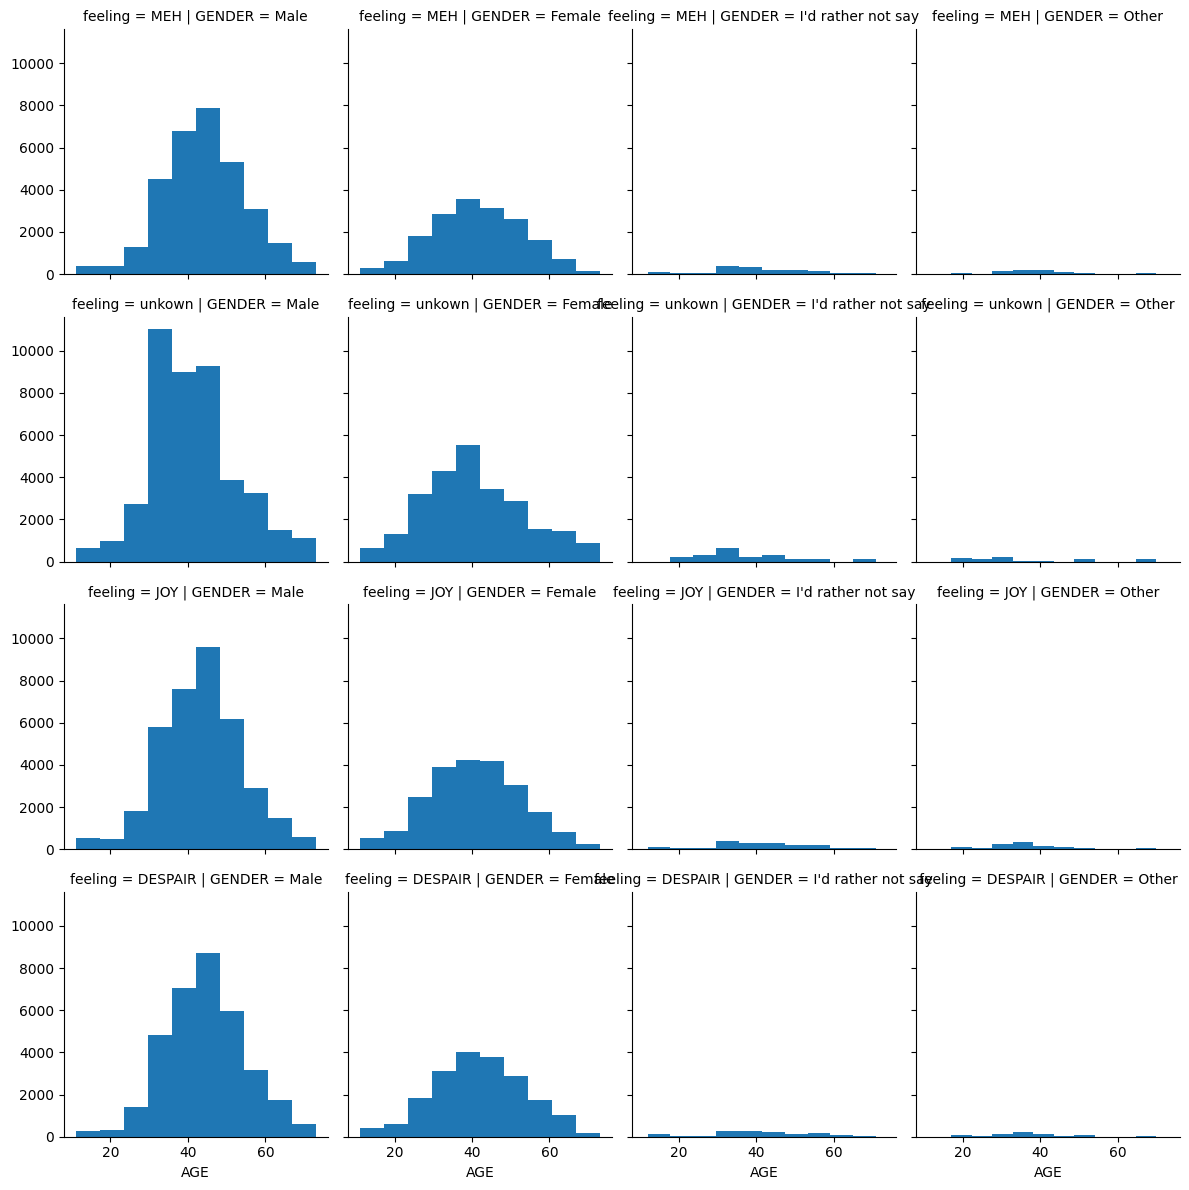

In [86]:
g=sns.FacetGrid(df_melt,row='feeling',col='GENDER')
g=g.map(plt.hist,'AGE')

## cleaning steps:
- checking wrong data types of columns
- cheack duplicate data and delete them 
- check missing values and handle then by deleting , fill them with (mean,mode,other values)
- dealing with data recorded with many forms